In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
(df.isna().sum() / df.isna().count() * 100).sort_values(ascending=False)

director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
rating           0.160411
description      0.000000
listed_in        0.000000
duration         0.000000
release_year     0.000000
title            0.000000
type             0.000000
show_id          0.000000
dtype: float64

In [5]:
## dropping show_id
df.drop(['show_id'],axis=1,inplace=True)

In [6]:
## relation between date_added and release_year

df[df['date_added'].isna()]


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6223,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


1. As we can see that date_added has the same year has release_year, so dropping date_added

In [7]:
df.drop(['date_added'], axis=1, inplace=True)

2. Dropping the director column as it has more than 30 values missing 
3. we can either drop cast or remove the rows having cast has null, I am removing cast column

In [8]:
df.drop(['director', 'cast'], axis=1, inplace=True)

In [9]:
df.country.value_counts(ascending=False)

United States                                     2032
India                                              777
United Kingdom                                     348
Japan                                              176
Canada                                             141
                                                  ... 
Israel, Sweden, Germany, Netherlands                 1
United States, United Kingdom, Italy                 1
Switzerland, France                                  1
Iceland, Sweden, Belgium                             1
United Kingdom, Germany, Canada, United States       1
Name: country, Length: 554, dtype: int64

Replacing Country values from USA as Netflix is the product of USA and most of the movies are form United States

In [10]:
df['country'].fillna('United States', inplace=True)

In [11]:
## Rating
df.rating.value_counts(ascending=False)

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

4. Replacing Null rating with the mode one

In [12]:
df.rating.fillna(df.rating.value_counts().head(1).idxmax(), inplace=True)

In [13]:
## checking Null Values again
df.isna().sum()


type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**<h1>EDA Starts</h1>**

In [14]:
df.head()

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


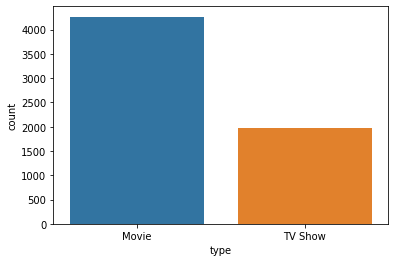

In [15]:
sns.countplot(df.type)

* From the above graph it shows that movies are approximate double in numbers than TV Shows

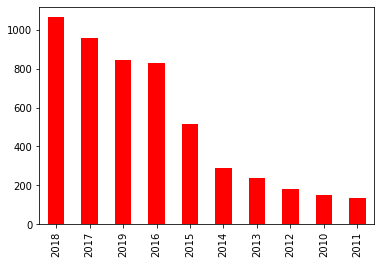

In [16]:
##df.groupby(['release_year'])['title'].count().sort_values(ascending=False).head()
df.release_year.value_counts(ascending=False).head(10).plot(kind='bar', color='red')

* As per the above graph a lot of content is released in the past last years and number is increasing per year approx

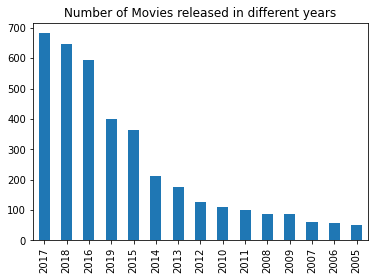

In [17]:
df[df['type'] == 'Movie'].release_year.value_counts(ascending=False).head(15).plot(kind='bar')
plt.title('Number of Movies released in different years')
plt.show()

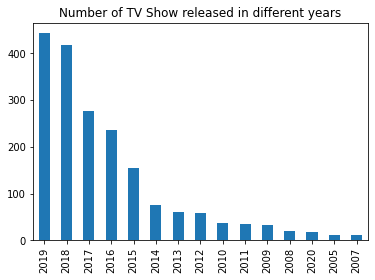

In [18]:
df[df['type'] == 'TV Show'].release_year.value_counts(ascending=False).head(15).plot(kind='bar')
plt.title('Number of TV Show released in different years')
plt.show()

In [19]:
## country graphs

def convertingtoList(column):
  column = [i.strip() for i in column.split(',')]
  return column

In [20]:

df.country = df.country.apply(convertingtoList)

df = df.explode('country')
df.head()

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,United States,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,India,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,South Korea,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,China,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


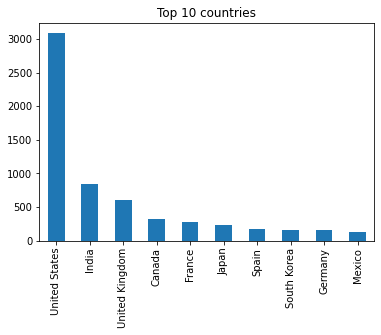

In [21]:
df.country.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 countries')
plt.show()

As we can see that mostly content is from USA

In [22]:
## Top 10 countries
cols_country = list(df.country.value_counts().head(10).index.values)
 

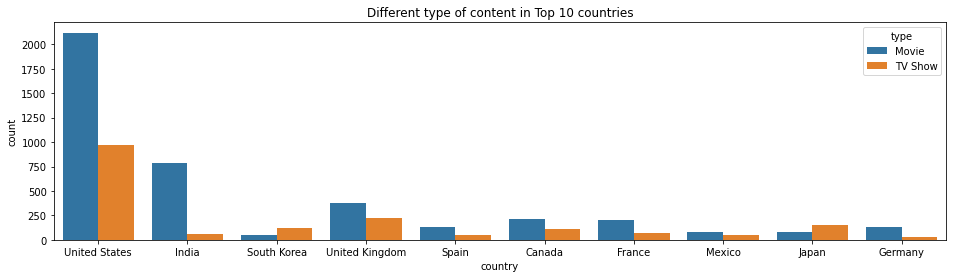

In [23]:
plt.figure(figsize=(16,4))
sns.countplot(df[df['country'].isin(cols_country)]['country'], hue=df[df['country'].isin(cols_country)]['type'])
plt.title('Different type of content in Top 10 countries')
plt.show()

Above graph shows that most countries has more number of movies than TV Shows.

**South Korea** and **Japan** are the countries showing more number of TV shows than Movies

In [24]:
## Gener Graphs

df.listed_in = df.listed_in.apply(convertingtoList)

df = df.explode('listed_in')
df.head()

,type,title,country,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,United States,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,United States,2019,TV-PG,90 min,Comedies,Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,India,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,India,2019,TV-PG,90 min,Comedies,Before planning an awesome wedding for his gra...
0,Movie,Norm of the North: King Sized Adventure,South Korea,2019,TV-PG,90 min,Children & Family Movies,Before planning an awesome wedding for his gra...


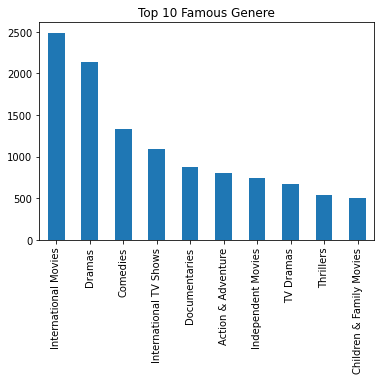

In [25]:
## Top Genere

df.listed_in.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Famous Genere')
plt.show()

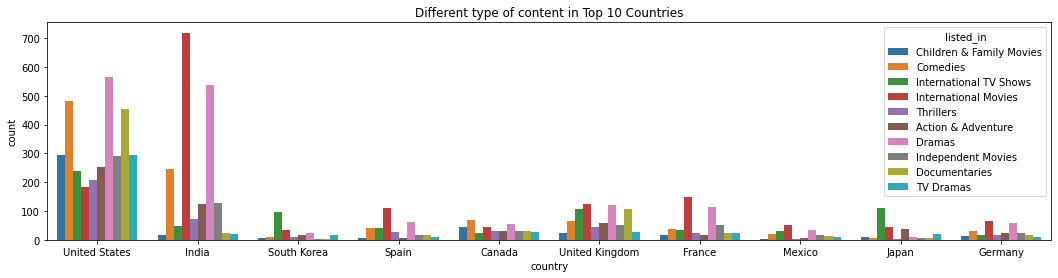

In [27]:
## Top 10 genere
cols_genere = list(df.listed_in.value_counts().head(10).index.values)

mask1 = df['country'].isin(cols_country)
mask2 = df['listed_in'].isin(cols_genere)

plt.figure(figsize=(18,4))
sns.countplot('country', hue='listed_in', data=df[mask1 & mask2])
plt.title('Different type of content in Top 10 Countries')
plt.show()
 

Above graph is implying many observations:-

1. TV Dramas are mainly famous in USA
2. Almost all top countries have their own share of drama content
3. International Movies are majorly famous in India, Spain, UK, France.
4. USA and UK have a significant amount of Documentries.
5. A major comedy content is from USA and India.

